In [127]:
#Basic Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

os.getcwd()

'C:\\Users\\ANAND\\EDA'

In [128]:
#import the df
df=pd.read_csv("Employee_Data.csv")
df.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889,NaN,NaN,NaN,NaN
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944,NaN,NaN,NaN,NaN
2,3,John,Bryant,Customer Relations,22.0,1.0,40343,NaN,NaN,NaN,NaN
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018,NaN,NaN,NaN,NaN
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795,NaN,NaN,NaN,NaN


In [129]:
df.columns

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [130]:
df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9','Unnamed: 10'],axis=1,inplace=True)

In [131]:
df.columns

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')

In [132]:
df.head(2)

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944


#Preprocessing part
### Step 1-Handling Missing value
### Step 2-Handling Encoding df
### Step 3-Handling Outlier
### Step 4- To do Feature Scaling - if required
### Step 5-To Handle Imbalance df- this is only applicable with classification problem

# Step 1-Handling Missing value

### Approches:
#### Rule 1- Check the threshold value(25% or more than 25% data are missed or not)-in case we have 25% or more data missed we have to drop that perticular data variable
#### Rule 2- If we have less than 25% data missed
##### Approches- 1) check variable whether it's character/object and numbers

##### In case data is numeric then we have to check boxplot and decide whether we have outlier or not
#### In case we have an Outlier then we will use Median else mean
##### a)Outlier found-Median b)Outlier not found- Mean

##### In case data is char/object we have to use MODE concept


In [133]:
#Check Missing value- True or False

df.isnull().any()

Employee Id    False
First Name     False
Last Name      False
Department      True
Age             True
Experience      True
Salary         False
dtype: bool

In [134]:
#Missing value count

df.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [135]:
#How much percent missing data we have?

print(df.isnull().sum()*100/len(df))

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age            18.0
Experience     10.0
Salary          0.0
dtype: float64


In [136]:
#How much observation and variable we have?

print(df.shape)
print(df.columns)

(100, 7)
Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')


In [137]:
#we will not drop the variable since we have less then 25% data are missed
#Following the rule 2- Check the variable type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64

 ** ####### 3   Department   81 non-null     object -Character- Mode

  ####### 4   Age          82 non-null     float64- Numeric-First check outlier and then decide whether mean or median

  ####### 5   Experience   90 non-null     float64 -Numeric-First check outlier and then decide whether mean or median **

In [138]:
# Target- Department- Mode concept
df["Department"].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [139]:
#impute "Sales and Marketing" in Department df

df["Department"]=df["Department"].fillna(df["Department"].mode()[0])

In [140]:
df["Department"].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [141]:
df.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department      0
Age            18
Experience     10
Salary          0
dtype: int64

In [142]:
#Age and Experience are numeric variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   100 non-null    object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


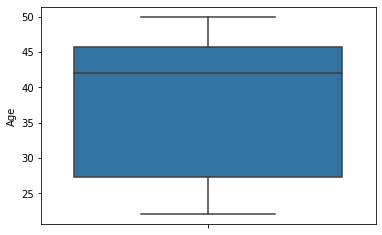

In [143]:
#Since it's number so we have to do first boxplot vizualisation
#and then will decide we can go by median or mean
sns.boxplot(y="Age",data=df)
plt.show()

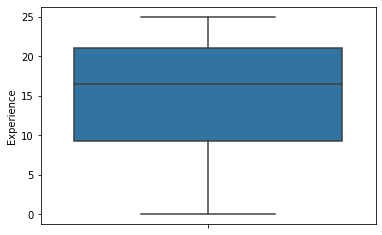

In [144]:
sns.boxplot(y="Experience",data=df)
plt.show()

In [145]:
#Both Age and Experience,we dont have an outlier so we will use mean techniques

In [146]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   100 non-null    object 
 4   Age          100 non-null    float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [148]:
df["Experience"]=df["Experience"].fillna(df["Experience"].mean())

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   100 non-null    object 
 4   Age          100 non-null    float64
 5   Experience   100 non-null    float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [150]:
df.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

#Step 2- Handling Encoding df

In [151]:
#taking Employee_Data which store in df

df.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [152]:
#We don't need employee id,first name and last name to predict salary
#We require only Department,Age and Experience to decide salary

#slice the df and remove the non-significant variable

df1=df.iloc[:,3:]

In [153]:
df1.head(2)

,Department,Age,Experience,Salary
0,Sales and Marketing,28.0,3.0,32889
1,Sales and Marketing,22.0,1.0,15944


In [154]:
#Encoding required in Department variable
df1["Department"].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [155]:
#Label Encoder- Char to Num

df1["Department"]=df1["Department"].astype("category")
df1["Department"]=df1["Department"].cat.codes
df1.head(25)

,Department,Age,Experience,Salary
0,2,28.0,3.000000,32889
1,2,22.0,1.000000,15944
2,1,22.0,1.000000,40343
3,1,22.0,1.000000,19018
4,0,27.0,0.000000,24795
5,0,26.0,5.000000,15387
6,1,24.0,6.000000,34117
7,1,29.0,2.000000,16099
8,2,29.0,5.000000,42105
9,1,30.0,6.000000,11891


In [156]:
df2=df.copy()

In [157]:
df2.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [158]:
df1.head()

,Department,Age,Experience,Salary
0,2,28.0,3.0,32889
1,2,22.0,1.0,15944
2,1,22.0,1.0,40343
3,1,22.0,1.0,19018
4,0,27.0,0.0,24795


In [159]:
df2=df.drop(["Employee Id","First Name","Last Name"],axis=1)

In [160]:
df2.head()

,Department,Age,Experience,Salary
0,Sales and Marketing,28.0,3.0,32889
1,Sales and Marketing,22.0,1.0,15944
2,Customer Relations,22.0,1.0,40343
3,Customer Relations,22.0,1.0,19018
4,Accounting,27.0,0.0,24795


In [161]:
df2=pd.get_dummies(df2,columns=["Department"])
df2.head()

,Age,Experience,Salary,Department_Accounting,Department_Customer Relations,Department_Sales and Marketing
0,28.0,3.0,32889,0,0,1
1,22.0,1.0,15944,0,0,1
2,22.0,1.0,40343,0,1,0
3,22.0,1.0,19018,0,1,0
4,27.0,0.0,24795,1,0,0


In [162]:
df1=pd.get_dummies(df1,columns=["Department"])
df1.head()

,Age,Experience,Salary,Department_0,Department_1,Department_2
0,28.0,3.0,32889,0,0,1
1,22.0,1.0,15944,0,0,1
2,22.0,1.0,40343,0,1,0
3,22.0,1.0,19018,0,1,0
4,27.0,0.0,24795,1,0,0


In [163]:
#Dummy Variable(n-1)
df1=df1.drop(["Department_2"],axis=1)

In [164]:
df1.head()

,Age,Experience,Salary,Department_0,Department_1
0,28.0,3.0,32889,0,0
1,22.0,1.0,15944,0,0
2,22.0,1.0,40343,0,1
3,22.0,1.0,19018,0,1
4,27.0,0.0,24795,1,0


Step3- Handling Outlier

In [165]:
outlier_data=pd.read_csv("OutlierData.csv")
outlier_data.head()

,Department,Age,Experience
0,HR,21,1
1,HR,33,12
2,IT,35,12
3,IT,36,12
4,HR,34,11


<AxesSubplot:ylabel='Age'>

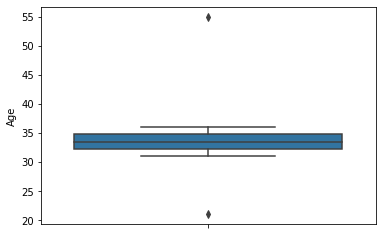

In [166]:
sns.boxplot(y="Age",data=outlier_data)

<AxesSubplot:ylabel='Experience'>

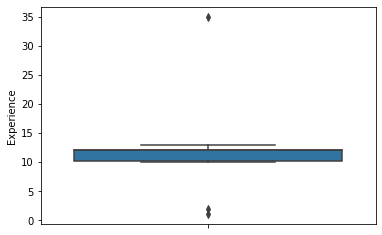

In [167]:
sns.boxplot(y="Experience",data=outlier_data)

In [168]:
#IQR=Q3-Q1
#post_oulier=Q3+1.5*IQR
#neg_outlier=Q1-1.5*IQR

Q1=outlier_data.quantile(0.25)

Q3=outlier_data.quantile(0.75)

IQR=Q3-Q1

print(Q1)


print(Q3)

print(IQR)

Age           32.25
Experience    10.25
Name: 0.25, dtype: float64
Age           34.75
Experience    12.00
Name: 0.75, dtype: float64
Age           2.50
Experience    1.75
dtype: float64


In [174]:
outlier=outlier_data[~((outlier_data<(Q1-1.5*IQR))|(outlier_data>(Q3+1.5*IQR))).any(axis=1)]

<AxesSubplot:ylabel='Age'>

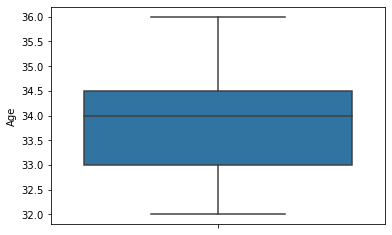

In [170]:
sns.boxplot(y="Age",data=outlier)

<AxesSubplot:ylabel='Experience'>

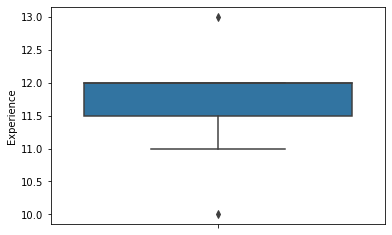

In [175]:
sns.boxplot(y="Experience",data=outlier)